## Iris, 보스턴 집값 데이터셋 Decision Tree 알고리즘 적용하기

#### 라이브러리 및 패키지 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix

### 분류 나무(Decision Tree Classifier)

#### iris 데이터 불러오기

In [2]:
# 데이터 로드
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target)

# 데이터 분할 (훈련 데이터와 테스트 데이터)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### 모델 학습

In [3]:
# 결정 트리 모델 학습
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)

# 모델 예측
y_pred = dtc.predict(X_test)

# 평가
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [4]:
# Feature 중요도
feature_importances = pd.DataFrame(dtc.feature_importances_, index=X.columns, columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

                   importance
petal length (cm)    0.893264
petal width (cm)     0.087626
sepal width (cm)     0.019110
sepal length (cm)    0.000000


#### 모형 시각화

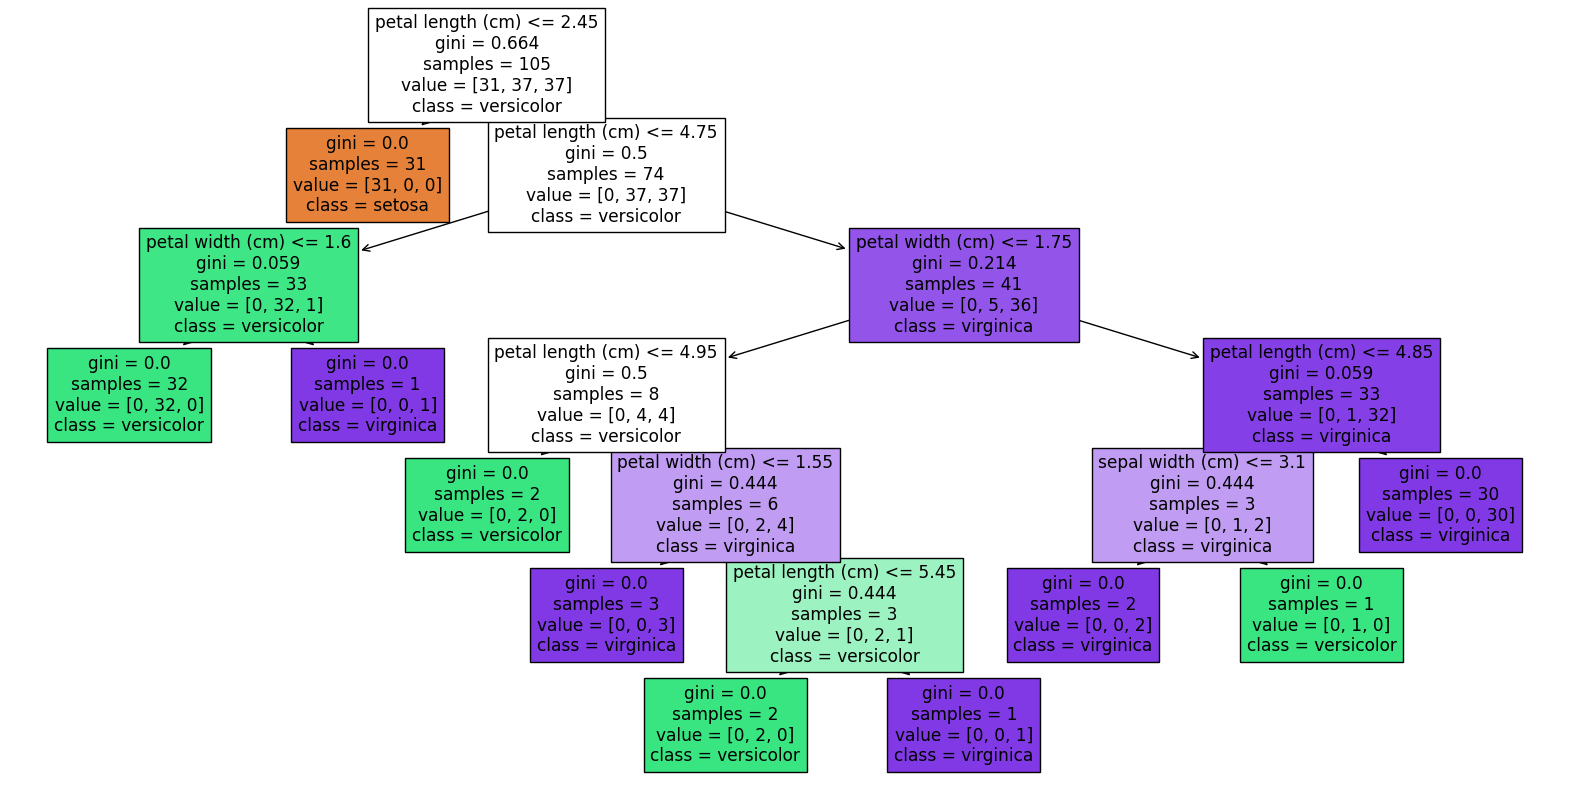

In [5]:
# 트리 시각화
plt.figure(figsize=(20,10))
plot_tree(dtc, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()

### 회귀 나무(Decision Tree Regressor)

#### 라이브러리 및 패키지 Import

In [6]:
from sklearn.datasets import load_boston
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

#### 보스턴 집값 데이터 불러오기

In [7]:
# 데이터 로드
boston = load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.Series(boston.target)

# 데이터 분할 (훈련 데이터와 테스트 데이터)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

/home/aibig30/anaconda3/envs/lecture/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Califo

#### 모델 학습

In [8]:
# 결정 트리 모델 학습
dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(X_train, y_train)

# 모델 예측
y_pred = dtr.predict(X_test)

# 평가
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
print(f'R-squared Score: {r2_score(y_test, y_pred)}')

Mean Squared Error: 11.588026315789474
R-squared Score: 0.8444833592340152


In [9]:
# Feature 중요도
feature_importances = pd.DataFrame(dtr.feature_importances_, index=X.columns, columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

         importance
RM         0.575807
LSTAT      0.189980
DIS        0.109624
CRIM       0.058465
PTRATIO    0.025043
B          0.011873
INDUS      0.009872
AGE        0.007170
NOX        0.007051
TAX        0.002181
RAD        0.001646
ZN         0.000989
CHAS       0.000297


#### 모형 시각화

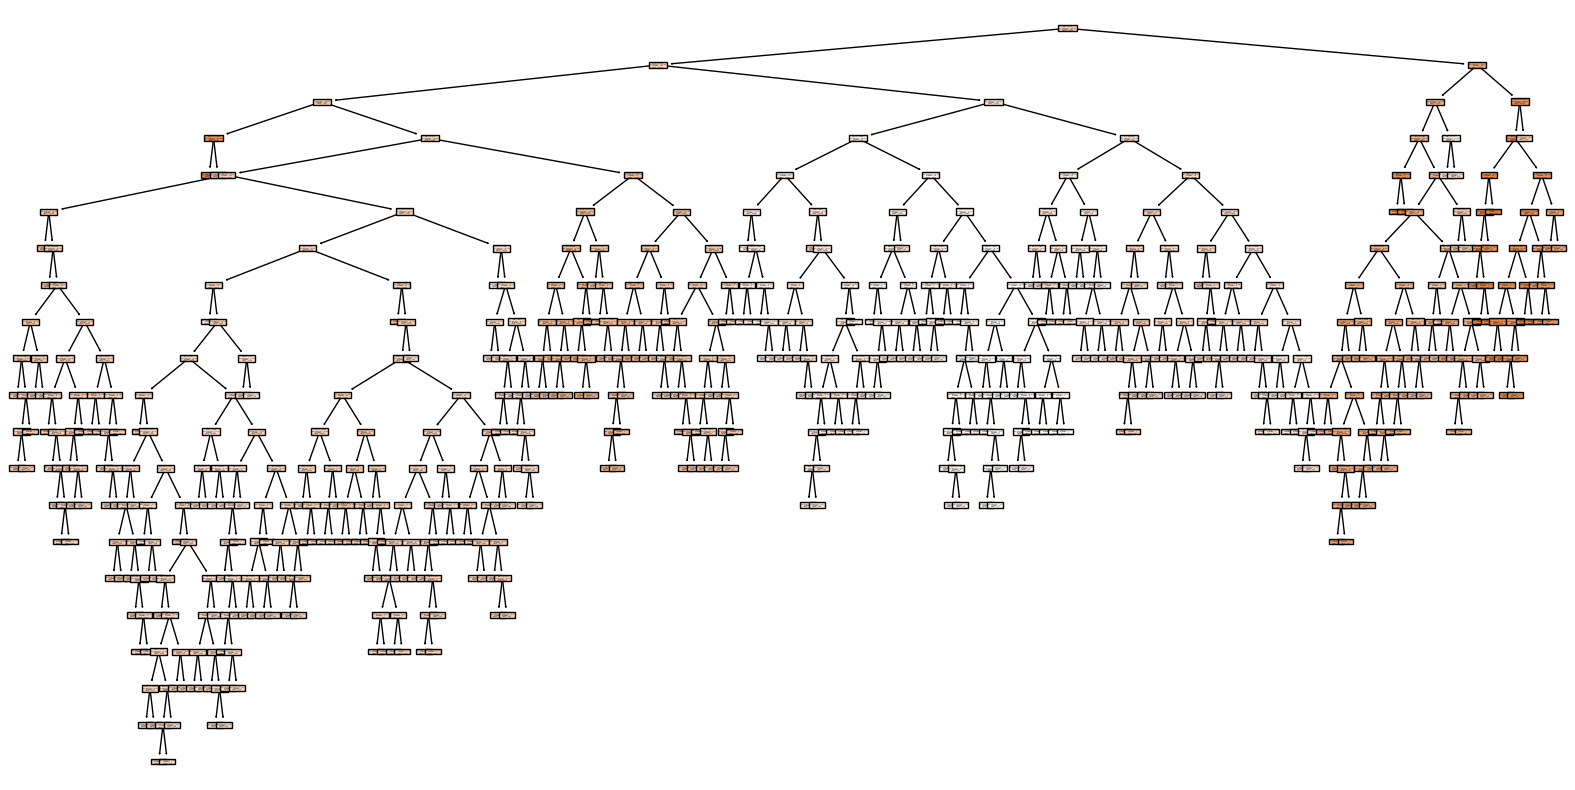

In [10]:
# 트리 시각화
plt.figure(figsize=(20,10))
plot_tree(dtr, filled=True, feature_names=boston.feature_names)
plt.show()